import modules

In [86]:
import rasterio
import numpy as np
from rasterio.windows import Window
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
import matplotlib.colors as mc
#import cmocean

open 60m band files and read files 


In [2]:
band2_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B02_60m.jp2').read().astype('float32')
band3_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B03_60m.jp2').read().astype('float32')
band4_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B04_60m.jp2').read().astype('float32')
band8_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B8A_60m.jp2').read().astype('float32')

flatten files 

In [3]:
blue_flat = band2_60.flatten()
green_flat = band3_60.flatten()
red_flat = band4_60.flatten()
NIR = band8_60.flatten()

stack files for visualisation

In [4]:
stacked2 = np.vstack((blue_flat, green_flat)).T
stacked3 = np.vstack((blue_flat, green_flat, red_flat)).T

create random state for clustering

In [101]:
random = random.randint(1,3000000)

KMeans clustering 

In [24]:
clustering = KMeans(n_clusters=2, random_state=random)
cluster1 = clustering.fit_predict(stacked2)
cluster2 = clustering.fit_predict(stacked3)


check shape of clusters 

In [ ]:
print('shape cluster 1', cluster1.shape)
print('shape cluster 2', cluster2.shape)

In [ ]:
plot_array_2 = np.reshape(cluster1, (len(band2_60[0]), len(band2_60[0])))
plot_array_3 = np.reshape(cluster2, (len(band2_60[0]), len(band2_60[0])))
#plot_array_4 = np.reshape(cluster2, (len(band2_60[0]), len(band2_60[0])))


In [ ]:
cmap = mc.LinearSegmentedColormap.from_list("", ['black', 'red', 'green', 'purple'])

fig , axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))
plt.sca(axes[0])
plt.imshow(plot_array_2, cmap=cmap)

plt.sca(axes[1])
plt.imshow(plot_array_3, cmap=cmap)

In [ ]:
# figuur makes no sense

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.scatter(reshaped_60m[0], reshaped_60m[1])
#plt.show()

plot clusters in 3D 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(stacked2[:,0], stacked2[:,1])
plt.show()

open 10m band files

In [16]:
with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B02_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band2_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B03_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band3_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B04_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band4_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B08_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band8A_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

flatten bands 

In [37]:
blue_10 = band2_10.flatten()
green_10 = band3_10.flatten()
red_10 = band4_10.flatten()
NIR_10 = band8A_10.flatten()

NDVI

In [102]:
ndvi_10 = (NIR_10-red_10) / (NIR_10+red_10)
ndvi_10 = ndvi_10.reshape(-1,1)

Stack files for visualization 

In [152]:
stackedBR_10 = np.vstack((blue_10, red_10)).T
stackedBGR_10 = np.vstack((blue_10, green_10, red_10)).T
stackedBGRNIR_10 = np.vstack((blue_10, green_10, red_10, NIR_10)).T
stackedvegetation_10 = np.vstack((NIR_10, red_10, green_10)).T
ref_image_10 = np.vstack((blue_10, red_10, green_10)).T

Clustering

In [114]:
#Two clusters

clustering_2 = KMeans(n_clusters=2, random_state=random)
clusterBR_10_2 = clustering_2.fit_predict(stackedBR_10)
clusterBGR_10_2 = clustering_2.fit_predict(stackedBGR_10)
clusterBGRNIR_10_2 = clustering_2.fit_predict(stackedBGRNIR_10)
cluster_veg_2 = clustering_2.fit_predict(stackedvegetation_10)
cluster_NDVI_2 = clustering_2.fit_predict(ndvi_10)


In [110]:
#Three cluster 

clustering_3 = KMeans(n_clusters=3, random_state=random)
clusterBR_10_3 = clustering_3.fit_predict(stackedBR_10)
clusterBGR_10_3 = clustering_3.fit_predict(stackedBGR_10)
clusterBGRNIR_10_3 = clustering_3.fit_predict(stackedBGRNIR_10)
cluster_veg_3 = clustering_3.fit_predict(stackedvegetation_10)
cluster_NDVI_3 = clustering_3.fit_predict(ndvi_10)

In [111]:
#Four clusters 

clustering_4 = KMeans(n_clusters=4, random_state=random)
clusterBR_10_4 = clustering_4.fit_predict(stackedBR_10)
clusterBGR_10_4 = clustering_4.fit_predict(stackedBGR_10)
clusterBGRNIR_10_4 = clustering_4.fit_predict(stackedBGRNIR_10)
cluster_veg_4 = clustering_4.fit_predict(stackedvegetation_10)
cluster_NDVI_4 = clustering_4.fit_predict(ndvi_10)

In [112]:
#Five clusters 

clustering_5 = KMeans(n_clusters=5, random_state=random)
clusterBR_10_5 = clustering_5.fit_predict(stackedBR_10)
clusterBGR_10_5 = clustering_5.fit_predict(stackedBGR_10)
clusterBGRNIR_10_5 = clustering_5.fit_predict(stackedBGRNIR_10)
cluster_veg_5 = clustering_5.fit_predict(stackedvegetation_10)
cluster_NDVI_5 = clustering_5.fit_predict(ndvi_10)

In [113]:
#Ten clusters 

clustering_10 = KMeans(n_clusters=10, random_state=random)
clusterBR_10_10 = clustering_10.fit_predict(stackedBR_10)
clusterBGR_10_10 = clustering_10.fit_predict(stackedBGR_10)
clusterBGRNIR_10_10 = clustering_10.fit_predict(stackedBGRNIR_10)
cluster_veg_10 = clustering_10.fit_predict(stackedvegetation_10)
cluster_NDVI_10 = clustering_10.fit_predict(ndvi_10)

make arrays for plotting

In [153]:
#reference image 
ref_plot = np.reshape(ref_image, (500, 700))


#two clusters 
BR_10_2 = np.reshape(clusterBR_10_2, (500, 700))
BGR_10_2 = np.reshape(clusterBGR_10_2, (500, 700))
BGRNIR_10_2 = np.reshape(clusterBGRNIR_10_2, (500, 700))
veg_10_2 = np.reshape(cluster_veg_2, (500, 700))
ndvi_10_2 = np.reshape(cluster_NDVI_2, (500, 700))

#three clusters 
BR_10_3 = np.reshape(clusterBR_10_3, (500, 700))
BGR_10_3 = np.reshape(clusterBGR_10_3, (500, 700))
BGRNIR_10_3 = np.reshape(clusterBGRNIR_10_3, (500, 700))
veg_10_3 = np.reshape(cluster_veg_3, (500, 700))
ndvi_10_3 = np.reshape(cluster_NDVI_3, (500, 700))

#four clusters 
BR_10_4 = np.reshape(clusterBR_10_4, (500, 700))
BGR_10_4 = np.reshape(clusterBGR_10_4, (500, 700))
BGRNIR_10_4 = np.reshape(clusterBGRNIR_10_4, (500, 700))
veg_10_4 = np.reshape(cluster_veg_4, (500, 700))
ndvi_10_4 = np.reshape(cluster_NDVI_4, (500, 700))

#five clusters 
BR_10_5 = np.reshape(clusterBR_10_5, (500, 700))
BGR_10_5 = np.reshape(clusterBGR_10_5, (500, 700))
BGRNIR_10_5 = np.reshape(clusterBGRNIR_10_5, (500, 700))
veg_10_5 = np.reshape(cluster_veg_5, (500, 700))
ndvi_10_5 = np.reshape(cluster_NDVI_5, (500, 700))

#ten clusters 
BR_10_10 = np.reshape(clusterBR_10_10, (500, 700))
BGR_10_10 = np.reshape(clusterBGR_10_10, (500, 700))
BGRNIR_10_10 = np.reshape(clusterBGRNIR_10_10, (500, 700))
veg_10_10 = np.reshape(cluster_veg_10, (500, 700))
ndvi_10_10 = np.reshape(cluster_NDVI_10, (500, 700))

ValueError: cannot reshape array of size 1050000 into shape (500,700)

plot clustered image 

Text(0.5, 1.0, &#39;Vegetation Index&#39;)

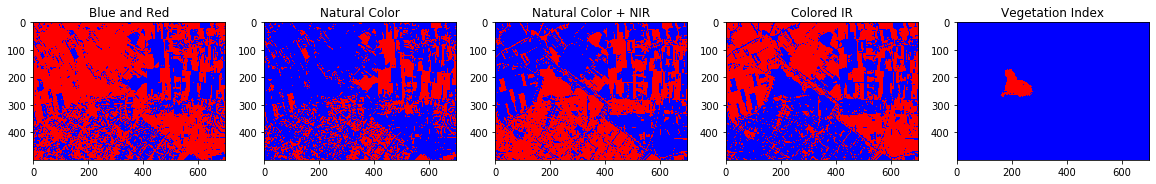

In [131]:
#Two clusters 

cmap = mc.LinearSegmentedColormap.from_list("", ['blue', 'red'])

fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
plt.imshow(BR_10_2, cmap=cmap)
plt.title('Blue and Red')

plt.sca(axes[1])
plt.imshow(BGR_10_2, cmap=cmap)
plt.title('Natural Color')

plt.sca(axes[2])
plt.imshow(BGRNIR_10_2, cmap=cmap)
plt.title('Natural Color + NIR')


plt.sca(axes[3])
plt.imshow(veg_10_2, cmap=cmap)
plt.title('Colored IR')

plt.sca(axes[4])
plt.imshow(ndvi_10_2, cmap=cmap)
plt.title('Vegetation Index')

&lt;matplotlib.image.AxesImage at 0x7fa46ceffe90&gt;

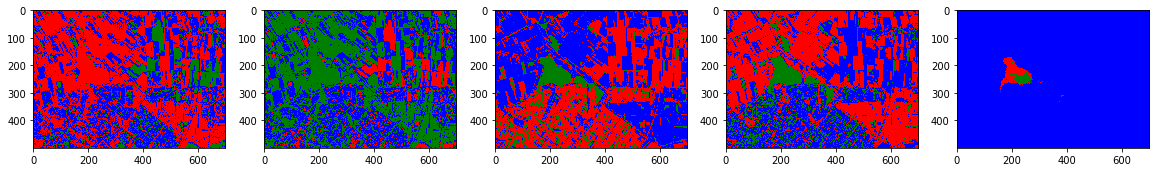

In [128]:
#Three clusters 
cmap = mc.LinearSegmentedColormap.from_list("", ['blue', 'red', 'green'])

fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
plt.imshow(BR_10_3, cmap=cmap)
plt.title('Blue and Red')

plt.sca(axes[1])
plt.imshow(BGR_10_3, cmap=cmap)
plt.title('Natural Color')

plt.sca(axes[2])
plt.imshow(BGRNIR_10_3, cmap=cmap)
plt.title('Natural Color + NIR')

plt.sca(axes[3])
plt.imshow(veg_10_3, cmap=cmap)
plt.title('Colored IR')

plt.sca(axes[4])
plt.imshow(ndvi_10_3, cmap=cmap)
plt.title('Vegetation Index')

Text(0.5, 1.0, &#39;Vegetation Index&#39;)

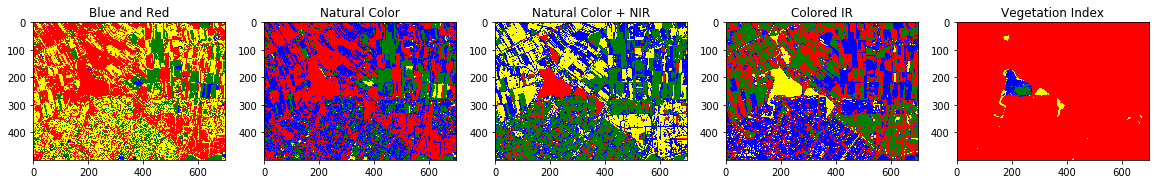

In [132]:
# Four clusters 
cmap = mc.LinearSegmentedColormap.from_list("", ['red', 'green', 'yellow', 'blue'])

fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
plt.imshow(BR_10_4, cmap=cmap)
plt.title('Blue and Red')

plt.sca(axes[1])
plt.imshow(BGR_10_4, cmap=cmap)
plt.title('Natural Color')

plt.sca(axes[2])
plt.imshow(BGRNIR_10_4, cmap=cmap)
plt.title('Natural Color + NIR')

plt.sca(axes[3])
plt.imshow(veg_10_4, cmap=cmap)
plt.title('Colored IR')

plt.sca(axes[4])
plt.imshow(ndvi_10_4, cmap=cmap)
plt.title('Vegetation Index')

Text(0.5, 1.0, &#39;Vegetation Index&#39;)

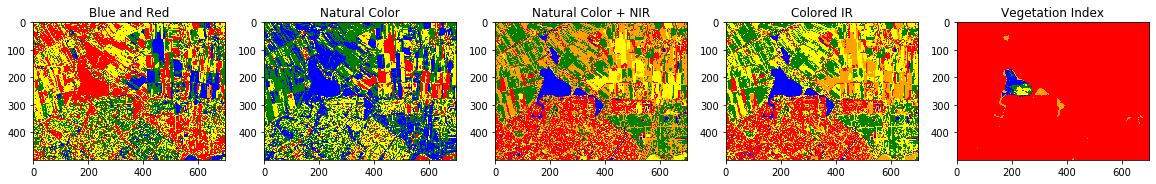

In [134]:
# Five clusters 
cmap = mc.LinearSegmentedColormap.from_list("", ['red', 'green', 'yellow', 'orange', 'blue'])

fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
plt.imshow(BR_10_5, cmap=cmap)
plt.title('Blue and Red')

plt.sca(axes[1])
plt.imshow(BGR_10_5, cmap=cmap)
plt.title('Natural Color')

plt.sca(axes[2])
plt.imshow(BGRNIR_10_5, cmap=cmap)
plt.title('Natural Color + NIR')

plt.sca(axes[3])
plt.imshow(veg_10_5, cmap=cmap)
plt.title('Colored IR')

plt.sca(axes[4])
plt.imshow(ndvi_10_5, cmap=cmap)
plt.title('Vegetation Index')

Text(0.5, 1.0, &#39;Vegetation Index&#39;)

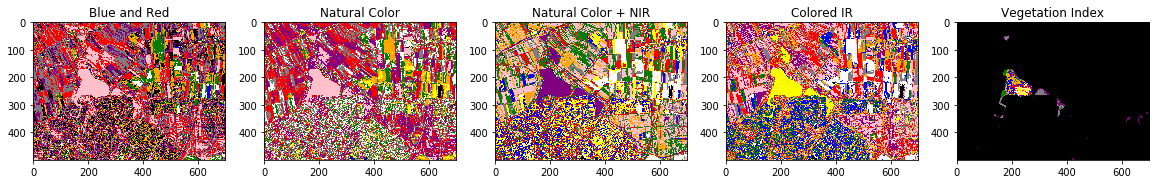

In [133]:
# Ten clusters 

cmap = mc.LinearSegmentedColormap.from_list("", ['black', 'red', 'green', 'purple', 'yellow', 'orange', 'pink', 'white', 'gray', 'blue'])

fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
plt.imshow(BR_10_10, cmap=cmap)
plt.title('Blue and Red')

plt.sca(axes[1])
plt.imshow(BGR_10_10, cmap=cmap)
plt.title('Natural Color')

plt.sca(axes[2])
plt.imshow(BGRNIR_10_10, cmap=cmap)
plt.title('Natural Color + NIR')

plt.sca(axes[3])
plt.imshow(veg_10_10, cmap=cmap)
plt.title('Colored IR')

plt.sca(axes[4])
plt.imshow(ndvi_10_10, cmap=cmap)
plt.title('Vegetation Index')

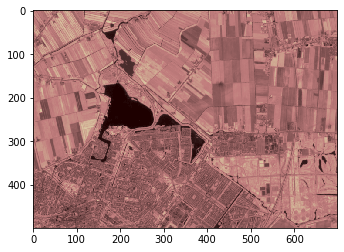

In [92]:

plt.imshow(band2_10, cmap = 'pink')
plt.imshow(band3_10, cmap = 'pink')
plt.imshow(band4_10, cmap = 'pink')
plt.imshow(band8A_10, cmap = 'pink')
plt.show()